In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [2]:
# # import data
# tsf_df = pd.read_csv('TSF.csv')
# tsf_df = tsf_df.drop_duplicates()
# tsf_df = tsf_df.rename(columns={"Tree Barcode - 树条码": "tree_id"})
# tsf_df['tree_id'] = tsf_df['tree_id'].astype(str)
# tif_df = pd.read_csv('TIF.csv', header=1)
# tif_df = tif_df.drop_duplicates()
# tif_df = tif_df.rename(columns={"Barcode and Picture - 条码和图片 : Tree Barcode - 树条码": "tree_id"})
# tif_df['tree_id'] = tif_df['tree_id'].astype(str)
# df = tsf_df.merge(tif_df,how='left',left_on='tree_id',right_on='tree_id')
# df.to_csv("TF_all.csv")

In [3]:
# import data
df = pd.read_csv('TF_all.csv')
list(df.columns)

['Unnamed: 0',
 'File',
 'sep= Submitting Device',
 'Device User_x',
 'Form Completed_x',
 'Upload Completed_x',
 'Submission ID_x',
 'Submission ID generated by device_x',
 'tree_id',
 'Tree Barcode - 树条码 : timestamp',
 'Tree Barcode - 树条码 : geostamp',
 'Tree Status - 树状态 : Tree Vitality Score Guide - 树活力评分指南',
 'Tree Status - 树状态 : Tree Vitality Score - 树活力评分',
 'Tree Status - 树状态 : Tree Vitality Score - 树活力评分 : timestamp',
 'Tree Status - 树状态 : Tree Vitality Score - 树活力评分 : geostamp',
 'Tree Status - 树状态 : Tree Status Image - 树状态图像',
 'Tree Status - 树状态 : Tree Symptom  -  树症状',
 'Tree Status - 树状态 : Twig symptom - 树枝症状',
 'Tree Status - 树状态 : Twig Vitality Score - 树活力评分',
 'Tree Status - 树状态 : Branch symptom - 分支症状',
 'Tree Status - 树状态 : Branch Vitality Score - 树活力评分',
 'Tree Status - 树状态 : Trunk symptom - 躯干症状',
 'Tree Status - 树状态 : Trunk Vitality Score - 树活力评分',
 'Tree Status - 树状态 :  Leaves symptom - 叶子症状',
 'Tree Status - 树状态 : Leaves Vitality Score - 树活力评分',
 'Tree Status - 树

In [4]:
# clean vitality score data
df['tree_vitality'] = df['Tree Status - 树状态 : Tree Vitality Score - 树活力评分'].str[:2]
df['tree_vitality'] = df['tree_vitality'].str.replace('Un','0')
df['tree_vitality'] = pd.to_numeric(df['tree_vitality'].str.strip())

# clean tree species data
df['tree_species'] = df['Tree Details - 树详细信息 : Tree species -  树种'].replace('Add New Tree Species -  添加新树种', np.nan)
df['tree_species'] = df['tree_species'].combine_first(df['Tree Details - 树详细信息 : New Tree Species - 添加新树种'])
df['tree_species'] = df['tree_species'].replace('C. japonica (Japanese cedar)', 'Japanese cedar - 日本雪松 - Cryptomeria japonica')
df['tree_species'] = df['tree_species'].str.split(' - ').str[0]

# clean beetle data
beetle_info_lst = ['Beetle Observation - 甲虫观察 : Beetle Family -  甲虫家族',
 'Beetle Observation - 甲虫观察 : Beetle Genus - 甲虫属',
 'Beetle Observation - 甲虫观察 : Beetle Genus -  甲虫属',
 'Beetle Observation - 甲虫观察 : Beetle Species -  甲虫种类',
 'Beetle Observation - 甲虫观察 : Beetle Species -  甲虫种类 2',
 'Beetle Observation - 甲虫观察 : Beetle Genus -  甲虫属 2',
 'Beetle Observation - 甲虫观察 : Beetle Genus -  甲虫属 3',
 'Beetle Observation - 甲虫观察 : Beetle Subfamily - 亚科/种类',
 'Beetle Observation - 甲虫观察 : Beetle Genus -  甲虫属 4',
 'Beetle Observation - 甲虫观察 : Beetle Genus -  甲虫属 5',
 'Beetle Observation - 甲虫观察 : Beetle Genus -  甲虫属 6',
 'Beetle Observation - 甲虫观察 : Beetle Genus -  甲虫属 7',
 'Beetle Observation - 甲虫观察 : Add New Beetle - 添加新甲壳虫']
beetle_df = df[beetle_info_lst]
beetle_df = beetle_df.fillna("")
for i in beetle_info_lst[:-1]:
    beetle_df[i] = beetle_df[i].str.split('-').str[0]
beetle_df['beetle_taxonomy'] = beetle_df.sum(axis=1)
beetle_df['beetle_taxonomy'] = beetle_df['beetle_taxonomy'].replace('Family: , Subfamily: , Genus:', '')
beetle_df['beetle_taxonomy'] = beetle_df['beetle_taxonomy'].replace('Family: Tettigoniidae', 'Tettigoniidae')
beetle_df['beetle_taxonomy'] = beetle_df['beetle_taxonomy'].replace('Formicidae ', 'Formicidae')
beetle_df['beetle_taxonomy'] = beetle_df['beetle_taxonomy'].replace('Lepidoptera ', 'Lepidoptera')
beetle_df['beetle_taxonomy'] = beetle_df['beetle_taxonomy'].replace('Hymenoptera ', 'Hymenoptera')
beetle_df['beetle_taxonomy'] = beetle_df['beetle_taxonomy'].replace('Scarabaeoidea ', 'Scarabaeoidea')
beetle_df['beetle_taxonomy'] = beetle_df['beetle_taxonomy'].replace('Lepidoptera:Crambidae', 'Lepidoptera Crambidae')
beetle_df['beetle_taxonomy'] = beetle_df['beetle_taxonomy'].replace('Curculionidae Scolytinae (Bark and Ambrosia Beetles)', 'Curculionidae Scolytinae')
beetle_df['beetle_taxonomy'] = beetle_df['beetle_taxonomy'].replace('Curculionidae Scolytinae (Bark and Ambrosia Beetles)Cryphalus', 'Curculionidae Scolytinae Cryphalus')
beetle_df['beetle_taxonomy'] = beetle_df['beetle_taxonomy'].replace('Curculionidae Scolytinae (Bark and Ambrosia Beetles)Pityophthorus', 'Curculionidae Scolytinae Pityophthorus')
beetle_df['beetle_taxonomy'] = beetle_df['beetle_taxonomy'].replace('Curculionidae Scolytinae (Bark and Ambrosia Beetles)Xyleborinus', 'Curculionidae Scolytinae Xyleborinus')
df['beetle_taxonomy'] = beetle_df['beetle_taxonomy']

# clean site data
df['tree_site'] = df['Tree Details - 树详细信息 : Site - 地点'].str.split(' - ').str[0]

###########
df.to_csv('TF_all_clean.csv', index=None)

In [5]:
# plot devices

# basic metadata of tree_id per place per person

<AxesSubplot:xlabel='tree_site'>

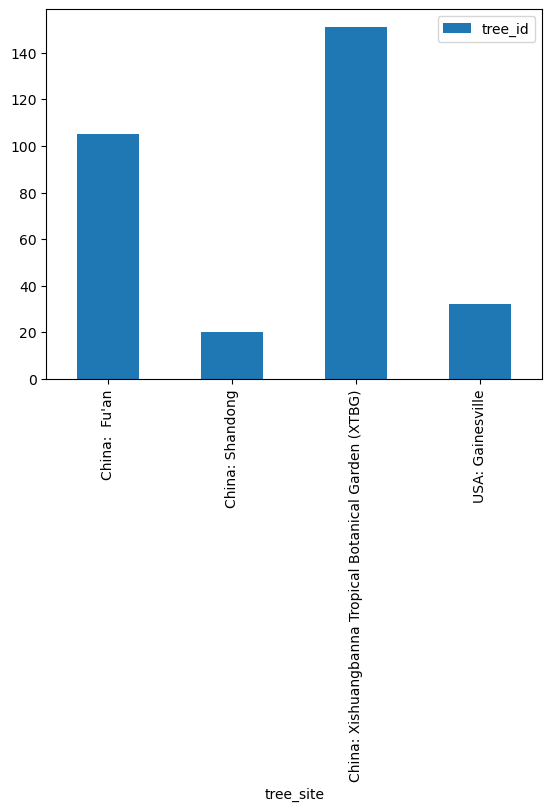

In [13]:
# number of trees per site
df[['tree_site', 'tree_id']].groupby('tree_site').nunique().plot(kind="bar")

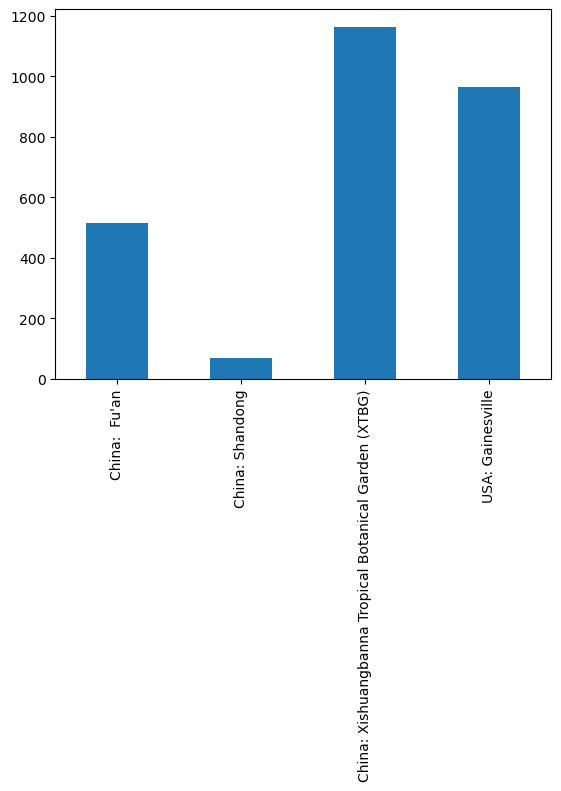

In [6]:
# plot site data observations per site
df['tree_site'].value_counts().sort_index().plot(kind='bar')
plt.show()

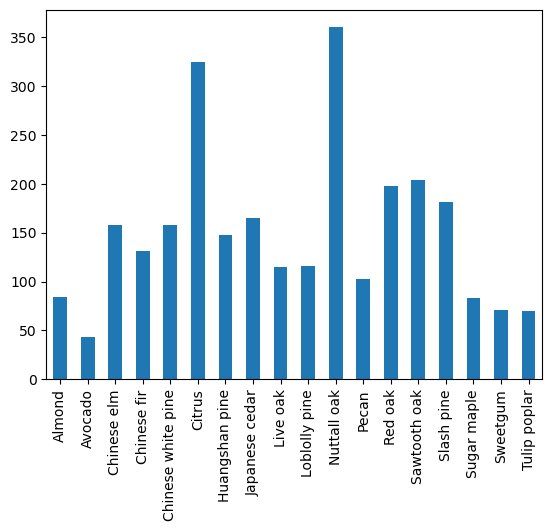

In [7]:
# plot tree species data
df['tree_species'].value_counts().sort_index().plot(kind='bar')
plt.show()

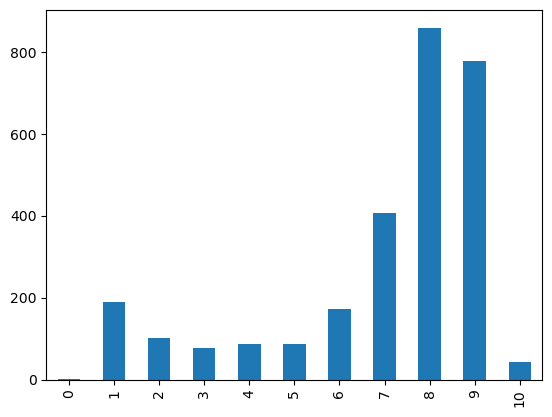

In [8]:
# plot vitality score data
df['tree_vitality'].value_counts().sort_index().plot(kind='bar')
plt.show()

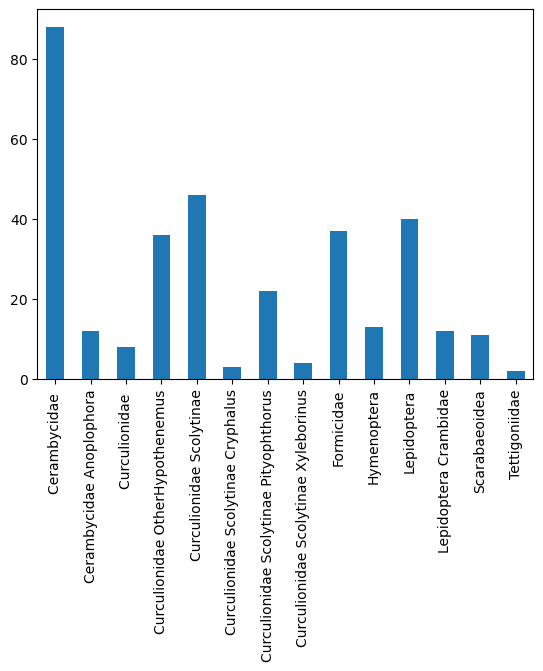

In [9]:
# plot beetles data
df[df['beetle_taxonomy'] != ""]['beetle_taxonomy'].value_counts().sort_index().plot(kind='bar')
plt.show()